In [1]:
import yfinance as yf
import pandas as pd
import math
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
acao = "PETR4.SA"
inicio = "2000-01-01"
final = "2024-12-31"


dados_acao = yf.download(acao, start=inicio, end=final)
print(dados_acao)

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2000-01-03   5.875000   5.875000   5.875000   5.875000   1.402440  35389440000
2000-01-04   5.550000   5.550000   5.550000   5.550000   1.324858  28861440000
2000-01-05   5.494000   5.494000   5.494000   5.494000   1.311490  43033600000
2000-01-06   5.475000   5.475000   5.475000   5.475000   1.306954  34055680000
2000-01-07   5.500000   5.500000   5.500000   5.500000   1.312922  20912640000
...               ...        ...        ...        ...        ...          ...
2024-06-24  36.840000  37.060001  36.480000  37.060001  37.060001     24599400
2024-06-25  37.049999  37.119999  36.759998  37.029999  37.029999     18572600
2024-06-26  36.799999  37.119999  36.709999  37.090000  37.090000     25553200
2024-06-27  37.509998  37.959999  37.320000  37.709999  37.709999     37731000
2024-06-28  37.799999  38.169998  37.709999  38.0499

# Significado das Colunas dos Dados Históricos da Bolsa de Valores

Quando você baixa dados históricos de ações da bolsa de valores, como no caso da Petrobras (PETR4.SA), você encontrará várias colunas que representam diferentes aspectos das negociações diárias. Aqui está uma explicação do que cada coluna significa:

1. **Open**:
   - **Descrição**: O preço da ação no início do dia de negociação.
   - **Significado**: Este é o preço ao qual a ação foi negociada pela primeira vez no dia.

2. **High**:
   - **Descrição**: O preço mais alto da ação durante o dia de negociação.
   - **Significado**: Indica o valor máximo que os investidores estavam dispostos a pagar pela ação durante aquele dia específico.

3. **Low**:
   - **Descrição**: O preço mais baixo da ação durante o dia de negociação.
   - **Significado**: Mostra o valor mínimo que os investidores estavam dispostos a aceitar para vender a ação durante o dia.

4. **Close**:
   - **Descrição**: O preço da ação no final do dia de negociação.
   - **Significado**: Este é o preço ao qual a ação foi negociada pela última vez no dia e é frequentemente usado como referência para o valor da ação.

5. **Adj Close**:
   - **Descrição**: O preço de fechamento ajustado da ação.
   - **Significado**: Ajustado para dividendos e desdobramentos de ações. Este valor reflete de maneira mais precisa o retorno real do investimento, considerando eventos corporativos.

6. **Volume**:
   - **Descrição**: O número total de ações negociadas durante o dia.
   - **Significado**: Representa a liquidez da ação, mostrando quantas ações mudaram de mãos durante o dia. Volumes altos indicam maior interesse e atividade de negociação na ação.

Essas colunas fornecem uma visão detalhada do comportamento da ação durante cada dia de negociação, permitindo que investidores e analistas façam avaliações e tomem decisões informadas.


In [3]:
cotacao = dados_acao['Close'].to_numpy().reshape(-1,1)
cotacao

array([[ 5.875     ],
       [ 5.55000019],
       [ 5.49399996],
       ...,
       [37.09000015],
       [37.70999908],
       [38.04999924]])

In [4]:
tamanho_dados_treinamento = int(len(cotacao)*0.7)
tamanho_dados_treinamento

4305

In [5]:
escalador = MinMaxScaler(feature_range=(0,1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

dados_entre_0_e_1


array([[0.03467192],
       [0.02794453],
       [0.02678535],
       ...,
       [0.68081145],
       [0.69364521],
       [0.7006831 ]])

In [6]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

treinamento_x = []

treinamento_y = []

for i in range(60, len(dados_para_treinamento)):
        treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
        treinamento_y.append(dados_para_treinamento[i,0])

        if i <= 61:

            print(treinamento_x)
            print(treinamento_y)


[array([0.03467192, 0.02794453, 0.02678535, 0.02639205, 0.02690955,
       0.02924861, 0.02639205, 0.02655765, 0.0232871 , 0.02483958,
       0.0235562 , 0.02407369, 0.0232871 , 0.02303872, 0.02069965,
       0.01993377, 0.01993377, 0.02121714, 0.02045126, 0.02045126,
       0.01865038, 0.02069965, 0.02276962, 0.02587456, 0.02873111,
       0.029497  , 0.03208446, 0.029497  , 0.02614366, 0.02252122,
       0.02096874, 0.02303872, 0.03183606, 0.03080109, 0.02821363,
       0.02794453, 0.02742704, 0.02821363, 0.03131857, 0.03442352,
       0.03208446, 0.03260195, 0.03467192, 0.03390602, 0.03804596,
       0.03804596, 0.03804596, 0.04100601, 0.04551854, 0.04166839,
       0.04166839, 0.03338854, 0.03494101, 0.0357069 , 0.03442352,
       0.03080109, 0.03311945, 0.03340924, 0.03338854, 0.03338854])]
[0.04243428387219421]
[array([0.03467192, 0.02794453, 0.02678535, 0.02639205, 0.02690955,
       0.02924861, 0.02639205, 0.02655765, 0.0232871 , 0.02483958,
       0.0235562 , 0.02407369, 0.023

In [7]:
treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

print(treinamento_x)

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

print(treinamento_x)

[[0.03467192 0.02794453 0.02678535 ... 0.03340924 0.03338854 0.03338854]
 [0.02794453 0.02678535 0.02639205 ... 0.03338854 0.03338854 0.04243428]
 [0.02678535 0.02639205 0.02690955 ... 0.03338854 0.04243428 0.03701097]
 ...
 [0.28751813 0.27923828 0.26205757 ... 0.24425586 0.24404886 0.24508386]
 [0.27923828 0.26205757 0.2469468  ... 0.24404886 0.24508386 0.24011593]
 [0.26205757 0.2469468  0.24404886 ... 0.24508386 0.24011593 0.23638999]]
[[[0.03467192]
  [0.02794453]
  [0.02678535]
  ...
  [0.03340924]
  [0.03338854]
  [0.03338854]]

 [[0.02794453]
  [0.02678535]
  [0.02639205]
  ...
  [0.03338854]
  [0.03338854]
  [0.04243428]]

 [[0.02678535]
  [0.02639205]
  [0.02690955]
  ...
  [0.03338854]
  [0.04243428]
  [0.03701097]]

 ...

 [[0.28751813]
  [0.27923828]
  [0.26205757]
  ...
  [0.24425586]
  [0.24404886]
  [0.24508386]]

 [[0.27923828]
  [0.26205757]
  [0.2469468 ]
  ...
  [0.24404886]
  [0.24508386]
  [0.24011593]]

 [[0.26205757]
  [0.2469468 ]
  [0.24404886]
  ...
  [0.2450

In [8]:
modelo = Sequential()


modelo.add(Input(shape=(treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=True))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))


print(treinamento_x.shape[1])

60


In [9]:
modelo.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

`EarlyStopping` é uma técnica usada durante o treinamento de redes neurais para prevenir overfitting e economizar tempo computacional. O overfitting ocorre quando um modelo de aprendizado de máquina se ajusta muito bem aos dados de treinamento, mas falha em generalizar bem para novos dados não vistos.

Aqui está uma explicação detalhada sobre o `EarlyStopping`:

### O que é `EarlyStopping`?

`EarlyStopping` monitora uma métrica específica durante o treinamento (geralmente a perda ou a precisão no conjunto de validação) e para o treinamento quando essa métrica não melhora após um número predefinido de epochs. Esse número é chamado de "patience" (paciência).

### Como `EarlyStopping` Funciona?

1. **Monitoramento de Métrica**:
   - Durante o treinamento, `EarlyStopping` monitora a métrica especificada (por exemplo, a perda no conjunto de validação).

2. **Definição de Paciência**:
   - A "paciência" define o número de epochs adicionais que o modelo será treinado após a última melhora observada na métrica monitorada. Se não houver melhora após esse número de epochs, o treinamento será interrompido.

3. **Restauração dos Melhores Pesos**:
   - A opção `restore_best_weights=True` permite que o modelo restaure os pesos obtidos na melhor epoch (onde a métrica monitorada teve o melhor valor). Isso garante que o modelo final seja o melhor possível com base nos dados de treinamento.

### Benefícios do `EarlyStopping`:

1. **Prevenção de Overfitting**:
   - Parando o treinamento quando o desempenho no conjunto de validação não melhora, `EarlyStopping` ajuda a evitar que o modelo se ajuste demais aos dados de treinamento e perca a capacidade de generalização.

2. **Economia de Tempo**:
   - O treinamento é interrompido assim que se percebe que o modelo não está melhorando, economizando tempo e recursos computacionais.

3. **Melhor Modelo Final**:
   - A restauração dos melhores pesos garante que o modelo final é aquele que teve o melhor desempenho durante o treinamento, em vez de um modelo potencialmente sobreajustado nas últimas epochs.



In [23]:
modelo.fit(treinamento_x, treinamento_y, batch_size=32, epochs=100, callbacks=[early_stop])

Epoch 1/100
133/133 [==============================] - 7s 49ms/step - loss: 1.3822e-04
Epoch 2/100
133/133 [==============================] - 8s 63ms/step - loss: 1.4439e-04
Epoch 3/100
133/133 [==============================] - 7s 50ms/step - loss: 1.3955e-04
Epoch 4/100
133/133 [==============================] - 8s 63ms/step - loss: 1.4564e-04
Epoch 5/100
133/133 [==============================] - 7s 49ms/step - loss: 1.3629e-04
Epoch 6/100
133/133 [==============================] - 9s 67ms/step - loss: 1.3411e-04
Epoch 7/100
133/133 [==============================] - 6s 49ms/step - loss: 1.2898e-04
Epoch 8/100
133/133 [==============================] - 9s 64ms/step - loss: 1.2557e-04
Epoch 9/100
133/133 [==============================] - 7s 56ms/step - loss: 1.3472e-04
Epoch 10/100
133/133 [==============================] - 10s 78ms/step - loss: 1.3633e-04
Epoch 11/100
133/133 [==============================] - 7s 49ms/step - loss: 1.2372e-04
Epoch 12/100
133/133 [==================

In [24]:
dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :]

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])

In [25]:
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [26]:
predicoes = modelo.predict(teste_x)

predicoes = escalador.inverse_transform(predicoes)
predicoes

58/58 [==============================] - 1s 17ms/step


array([[14.709344],
       [14.782174],
       [14.797087],
       ...,
       [36.91527 ],
       [37.004494],
       [37.688126]], dtype=float32)

In [27]:
rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

0.14111237306258867

In [28]:
treinamento = dados_acao.iloc[:tamanho_dados_treinamento, :]
df_teste = pd.DataFrame({"Close": dados_acao["Close"].iloc[tamanho_dados_treinamento:],
                        "predicoes": predicoes.reshape(len(predicoes))})

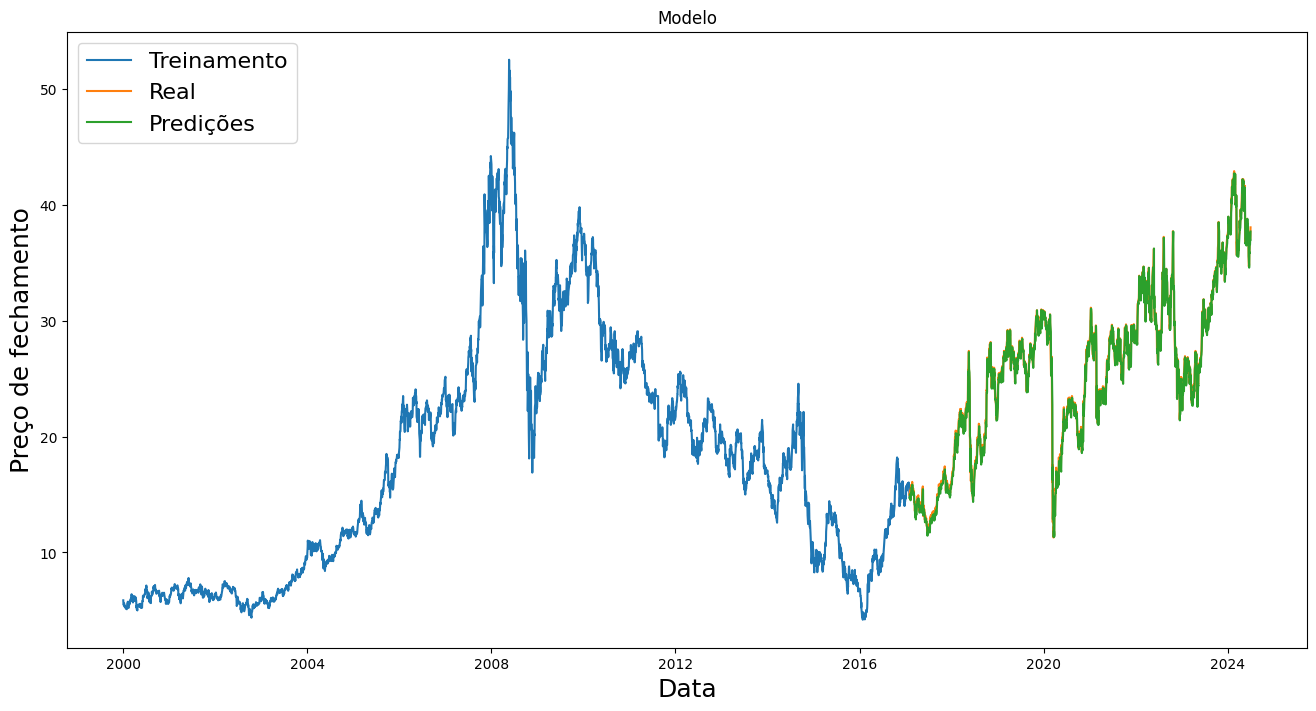

In [29]:
plt.figure(figsize = (16,8))
plt.title("Modelo")
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preço de fechamento', fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [30]:
df_teste.sort_index()

df_teste

,Close,predicoes
Date,,
2017-01-31,15.020000,14.709344
2017-02-01,15.020000,14.782174
2017-02-02,14.890000,14.797087
2017-02-03,15.340000,14.681112
2017-02-06,14.960000,15.058270
...,...,...
2024-06-24,37.060001,36.578156
2024-06-25,37.029999,36.977703
2024-06-26,37.090000,36.915272


In [31]:
df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, True, False)


df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero'], True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

<ipython-input-31-fcf7bd1eb798>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, True, False)
<ipython-input-31-fcf7bd1eb798>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, True, False)
<ipython-input-31-fcf7bd1eb798>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2017-02-01,15.020000,14.782174,0.000000,0.004951,False,False,True,0.000000
2017-02-02,14.890000,14.797087,-0.008655,0.001009,False,False,True,0.008655
2017-02-03,15.340000,14.681112,0.030222,-0.007838,True,True,True,0.030222
2017-02-06,14.960000,15.058270,-0.024772,0.025690,False,False,True,0.024772
2017-02-07,14.700000,14.772514,-0.017380,-0.018977,False,False,True,0.017380
...,...,...,...,...,...,...,...,...
2024-06-24,37.060001,36.578156,0.010085,0.004050,True,True,True,0.010085
2024-06-25,37.029999,36.977703,-0.000810,0.010923,False,False,True,0.000810
2024-06-26,37.090000,36.915272,0.001620,-0.001688,True,True,True,0.001620


<ipython-input-32-20b90f006887>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste.loc[:, 'erro_previsao'] = df_teste['Close'] - df_teste['predicoes']


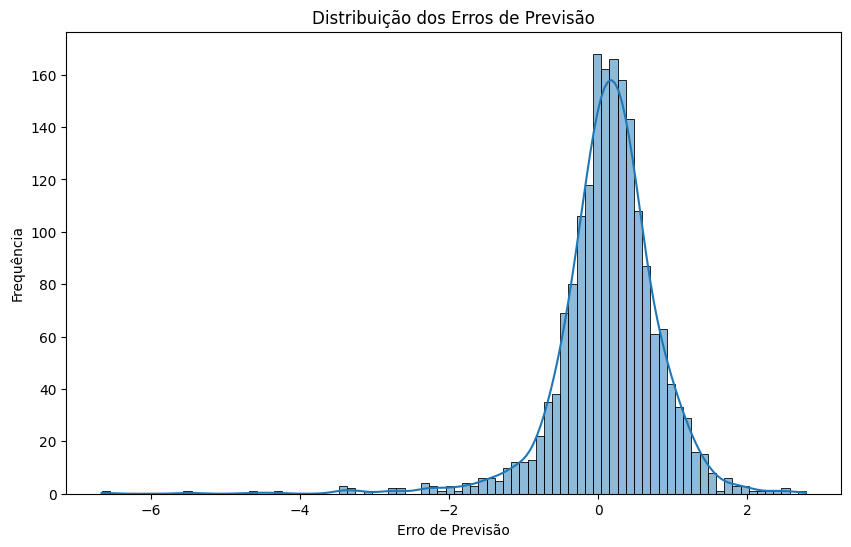

Média dos erros de previsão: 0.14102042936709852
Mediana dos erros de previsão: 0.1709613800048828
Desvio padrão dos erros de previsão: 0.6955284748133939


<ipython-input-32-20b90f006887>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste.loc[:, 'retorno_diario'] = df_teste['predicoes'].pct_change()
<ipython-input-32-20b90f006887>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste.loc[:, 'rendimento_acumulado'] = (1 + df_teste['retorno_diario']).cumprod()


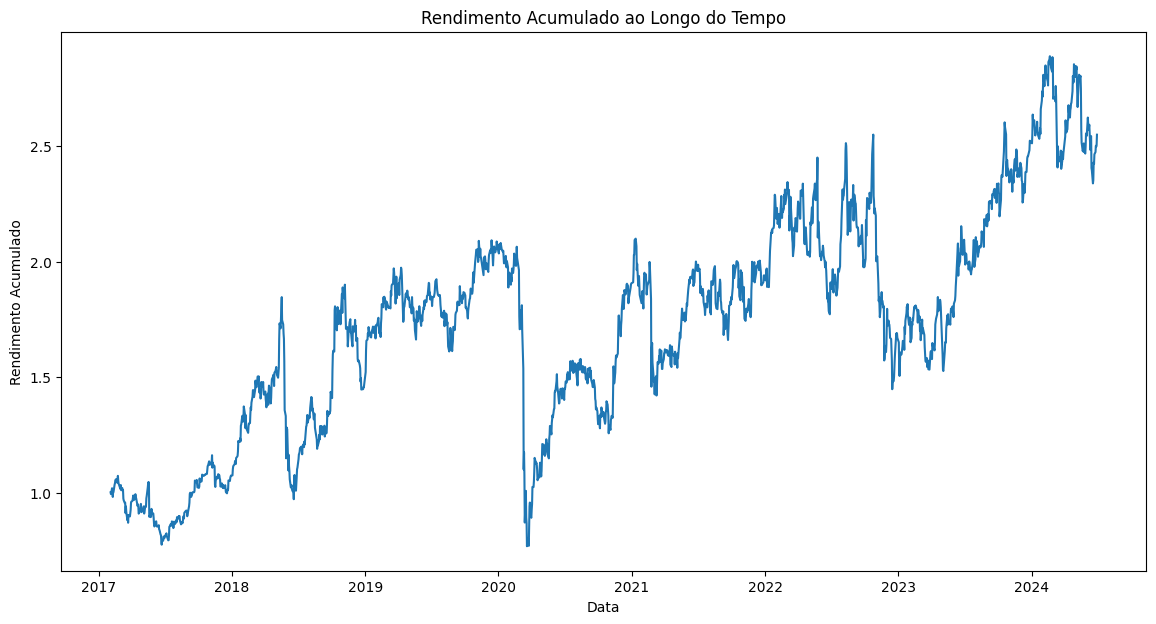

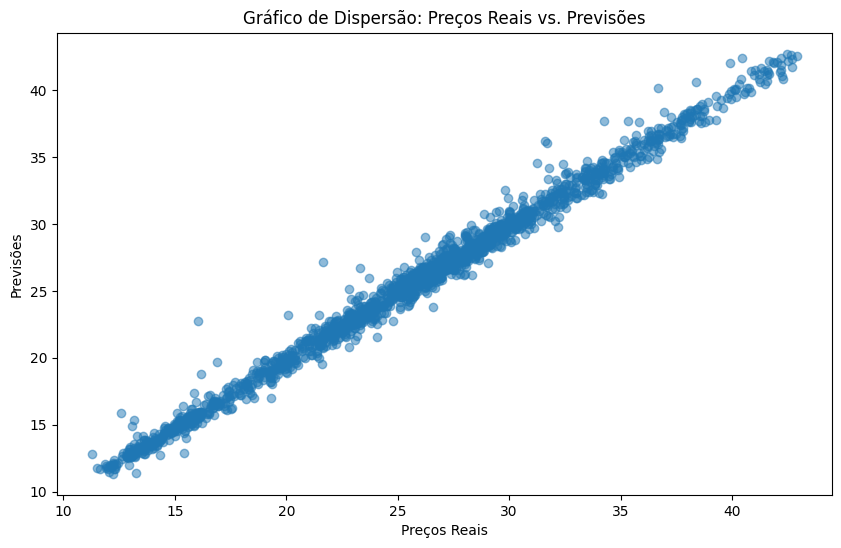

Rendimento acumulado em 1 semana: 0.71%
Rendimento acumulado em 1 mês: 3.00%
Rendimento acumulado em 1 ano: 42.64%


In [32]:
df_teste.loc[:, 'erro_previsao'] = df_teste['Close'] - df_teste['predicoes']

plt.figure(figsize=(10, 6))
sns.histplot(df_teste['erro_previsao'], kde=True)
plt.title('Distribuição dos Erros de Previsão')
plt.xlabel('Erro de Previsão')
plt.ylabel('Frequência')
plt.show()

media_erro = df_teste['erro_previsao'].mean()
mediana_erro = df_teste['erro_previsao'].median()
desvio_padrao_erro = df_teste['erro_previsao'].std()

print(f"Média dos erros de previsão: {media_erro}")
print(f"Mediana dos erros de previsão: {mediana_erro}")
print(f"Desvio padrão dos erros de previsão: {desvio_padrao_erro}")

df_teste.loc[:, 'retorno_diario'] = df_teste['predicoes'].pct_change()

df_teste.loc[:, 'rendimento_acumulado'] = (1 + df_teste['retorno_diario']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(df_teste['rendimento_acumulado'])
plt.title('Rendimento Acumulado ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Rendimento Acumulado')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_teste['Close'], df_teste['predicoes'], alpha=0.5)
plt.title('Gráfico de Dispersão: Preços Reais vs. Previsões')
plt.xlabel('Preços Reais')
plt.ylabel('Previsões')
plt.show()

rendimento_uma_semana = (1 + media_erro / 100) ** 5 - 1
rendimento_um_mes = (1 + media_erro / 100) ** 21 - 1
rendimento_um_ano = (1 + media_erro / 100) ** 252 - 1

print(f"Rendimento acumulado em 1 semana: {rendimento_uma_semana * 100:.2f}%")
print(f"Rendimento acumulado em 1 mês: {rendimento_um_mes * 100:.2f}%")
print(f"Rendimento acumulado em 1 ano: {rendimento_um_ano * 100:.2f}%")
